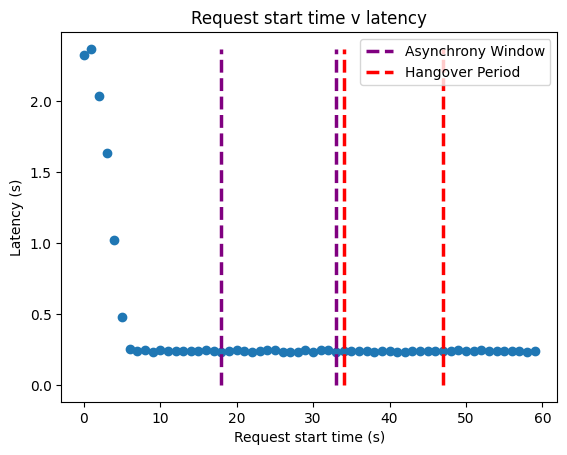

In [6]:
import numpy as np
import matplotlib.pyplot as plt

lines = []
with open('latencies.txt') as f:
    lines = f.read().splitlines()

latencies = []
xs = []
ys = []
smoothed_y = []
actual_xs = []
actual_ys = []
for line in lines:
    tmp = line.split(',')
    xs.append(float(tmp[0]))
    ys.append(float(tmp[2]))

start = 0
end = 120
for i in range(len(xs)):
    if int(xs[i]) == start:
        smoothed_y.append(ys[i])
    else:
        mean = sum(smoothed_y) / len(smoothed_y)
        actual_xs.append(start)
        actual_ys.append(mean)
        smoothed_y.clear()
        start = start + 1

plt.vlines(x=[18, 33], ymin=0, ymax=max(actual_ys), colors='purple', ls='--', lw=2.5, label='Asynchrony Window')
plt.vlines(x=[34, 47], ymin=0, ymax=max(actual_ys), colors='red', ls='--', lw=2.5, label='Hangover Period')

plt.xlabel('Request start time (s)')
plt.ylabel('Latency (s)')
plt.title("Request start time v latency")
plt.legend()
plt.scatter(actual_xs[:end], actual_ys[:end])
plt.show()
